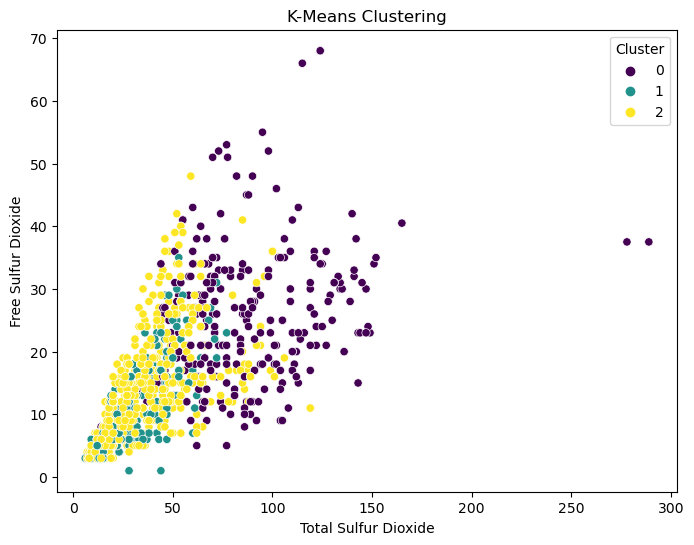

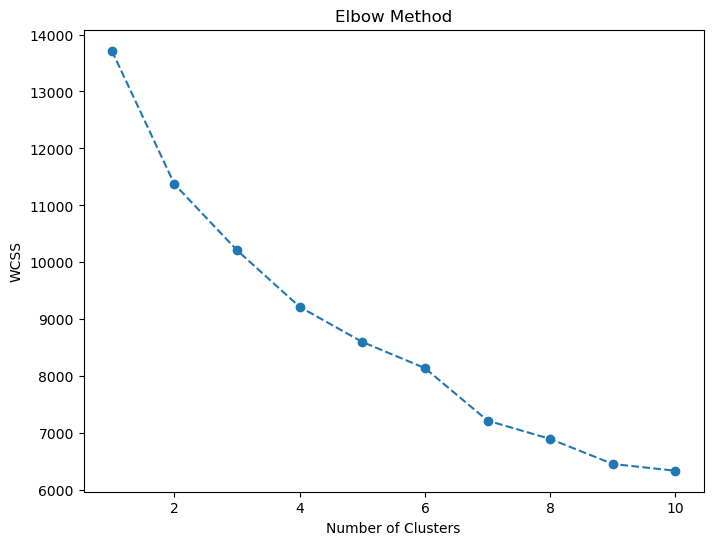

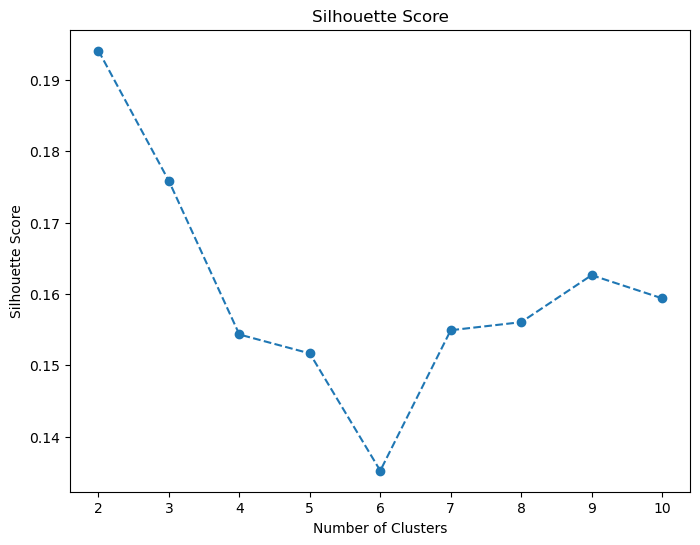

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
Cluster                 0
dtype: int64


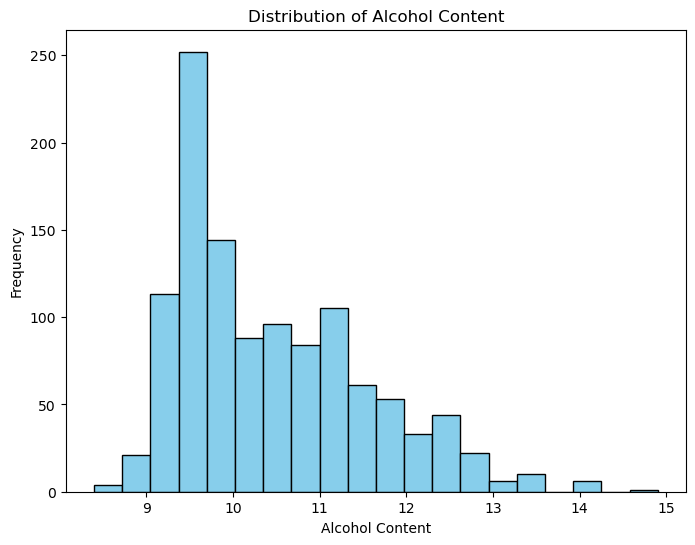

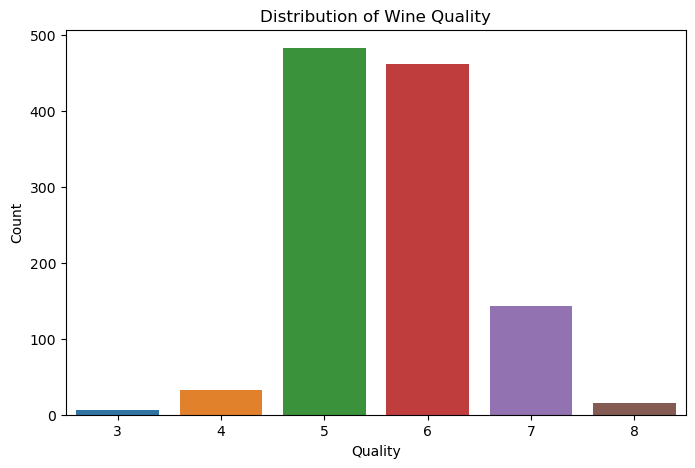

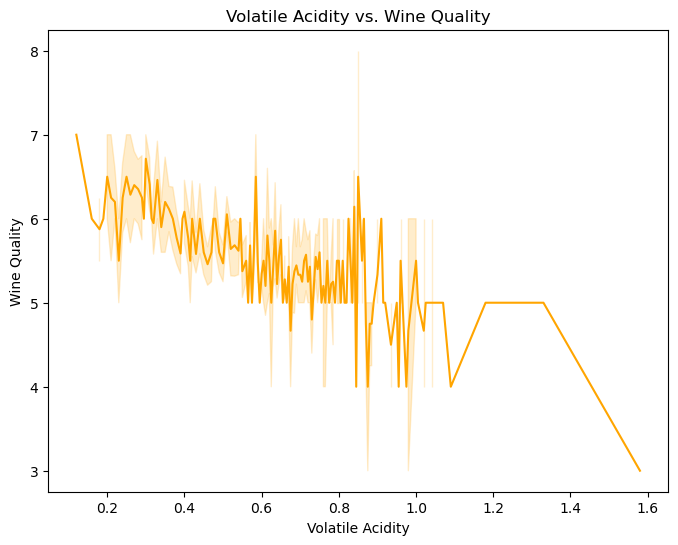

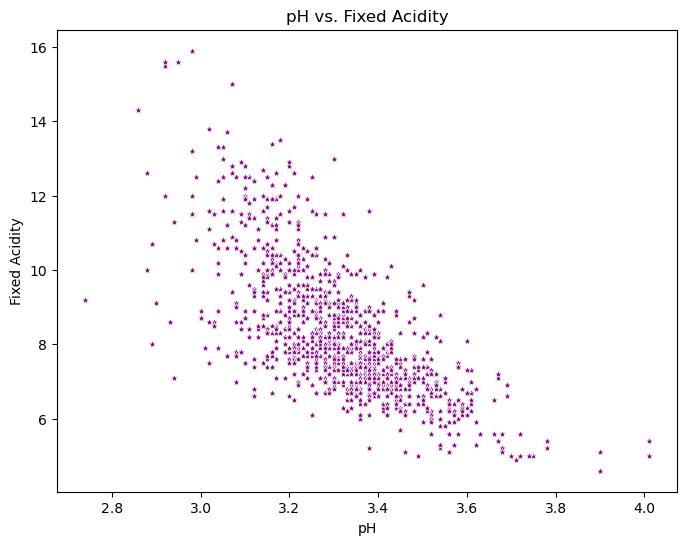

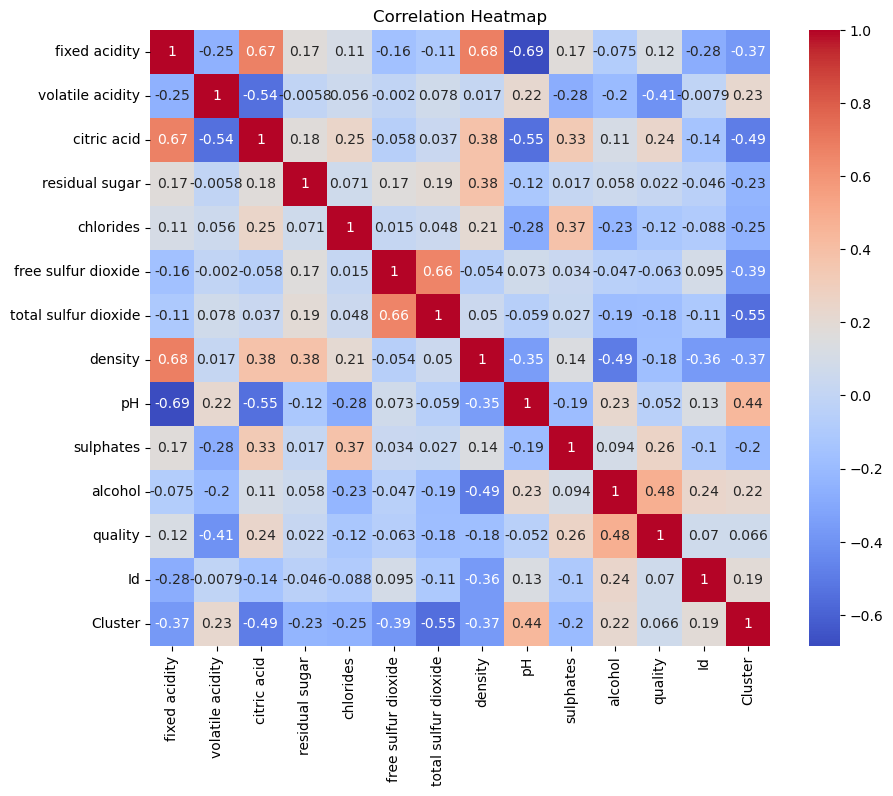

,Count,Mean,Std Dev,Min,25%,50%,75%,Max,Skewness,Kurtosis,Median
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000,7.90000,1.044930,1.384614
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000,0.52000,0.681547,1.375531
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000,0.25000,0.371561,-0.714686
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000,2.20000,4.361096,27.675366
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100,0.07900,6.026360,47.078324
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000,13.00000,1.231261,1.932170
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000,37.00000,1.665766,5.098748
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369,0.99668,0.102395,0.888123
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000,3.31000,0.221138,0.925791
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000,0.62000,2.497266,12.017377


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
wine_data = pd.read_csv("WineQT.csv")



def hist_alchcontent():
    """
    Plot a histogram of alcohol content.

    This function assumes that you have a DataFrame named wine_data containing the alcohol content data.

    """
    plt.figure(figsize=(8, 6))
    plt.hist(wine_data['alcohol'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Alcohol Content')
    plt.xlabel('Alcohol Content')
    plt.ylabel('Frequency')
    plt.show()


# Histogram of wine quality
def plot_histGraph(wine_data):
    """
    Histogram display the distribution of wine quality and count.

    Parameters:
    - wine_data (DataFrame): The input DataFrame containing wine data.
    """
    plt.figure(figsize=(8, 5))
    sns.countplot(x='quality', data=wine_data)
    plt.title('Distribution of Wine Quality')
    plt.xlabel('Quality')
    plt.ylabel('Count')
    plt.show()

# Bar chart of wine type
def bar_wineType(wine_data):
    """
    Bar chart display the distribution of wine types based on pH count.

    Parameters:
    - wine_data (DataFrame): The input DataFrame containing wine data.
    """
    plt.figure(figsize=(8, 6))
    wine_data['pH'].value_counts().plot(kind='bar', color='green')
    plt.title('Distribution of Wine Types')
    plt.xlabel('Wine Type')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

# Line graph of volatile acidity vs. wine quality
def line_Graph(wine_data, i, j):
    """
    Plot a line graph showing the relationship between two variables (Volatile Acidity, Wine Quality).

    Parameters:
    - wine_data (DataFrame): The input DataFrame containing wine data.
    - i (str): The name of the column for the x-axis.
    - j (str): The name of the column for the y-axis.
    """
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=i, y=j, data=wine_data, color='orange')
    plt.title('Volatile Acidity vs. Wine Quality')
    plt.xlabel('Volatile Acidity')
    plt.ylabel('Wine Quality')
    plt.show()

# Scatter plot of pH vs. fixed acidity
def scatter_ph_and_acidity(wine_data, i, j, color):
    """
    Plot a scatter plot showing the relationship between pH and fixed acidity.

    Parameters:
    - wine_data (DataFrame): The input DataFrame containing wine data.
    - i (str): The name of the column for the x-axis (pH).
    - j (str): The name of the column for the y-axis (fixed acidity).
    - color (str): Color for the markers.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=i, y=j, data=wine_data, color=color, marker='*')
    plt.title('pH vs. Fixed Acidity')
    plt.xlabel('pH')
    plt.ylabel('Fixed Acidity')
    plt.show()

# Heatmap of correlation matrix
def corr_matrix(wine_data):
    """
    Plot a correlation heatmap.

    Parameters:
    - wine_data (DataFrame): The input DataFrame containing wine data.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Separate features and target variable
X = wine_data.drop('quality', axis=1)
Y = wine_data['quality']

# Data Preprocessing: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using elbow method
def calculate_wcss(X_scaled, max_clusters=10):
    """
    Calculate the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters.

    Parameters:
    X_scaled (array-like): Scaled feature matrix.
    max_clusters (int): Maximum number of clusters to consider. Defaults to 10.

    Returns:
    list: WCSS values for different numbers of clusters.
    """
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
    return wcss

wcss = calculate_wcss(X_scaled)

# Fit k-means clustering with the optimal number of clusters
def fit_kmeans(X_scaled, n_clusters=3):
    """
    Fit k-means clustering with the optimal number of clusters.

    Parameters:
    X_scaled (array-like): Scaled feature matrix.
    n_clusters (int): Number of clusters. Defaults to 3.

    Returns:
    KMeans: Fitted k-means clustering model.
    """
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    return kmeans

kmeans_model = fit_kmeans(X_scaled, n_clusters=3)

# Add cluster labels to the dataset
wine_data['Cluster'] = kmeans_model.labels_

# Visualize clustering results (scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total sulfur dioxide', y='free sulfur dioxide', hue='Cluster', data=wine_data, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Free Sulfur Dioxide')
plt.show()

# Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette plot
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

def calculate_Statics(dataframe):
    """
    Calculate various statistics for numerical columns in a DataFrame.

    Parameters:
    - dataframe: DataFrame containing numerical data.

    Returns:
    - statistics_df: DataFrame containing statistics such as count, mean, standard deviation, 
                     minimum, 25th percentile, median, 75th percentile, maximum, skewness, 
                     kurtosis, and median for each numerical column.
    """
    numeric_columns = dataframe.select_dtypes(include=['int', 'float']).columns
    moments = dataframe[numeric_columns].describe().transpose()
    
    # Calculate median separately
    median = dataframe[numeric_columns].median()
    
    # Calculate skewness and kurtosis
    skewness = dataframe[numeric_columns].skew()
    kurtosis = dataframe[numeric_columns].kurtosis()
    
    # Concatenate median with other statistics
    statistics_df = pd.concat([moments, median, skewness, kurtosis], axis=1)
    
    # Define column names
    statistics_df.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max', 'Skewness', 'Kurtosis', 'Median']
    
    return statistics_df

wine_data.head()

# Check for missing values
print(wine_data.isnull().sum())

hist_alchcontent()

plot_histGraph(wine_data)

a = 'volatile acidity'
b = 'quality'
line_Graph(wine_data, a, b)

i = 'pH'
j = 'fixed acidity'
color = 'purple'
scatter_ph_and_acidity(wine_data, i, j, color)

corr_matrix(wine_data)


calculate_Statics(wine_data)